In [3]:
%%html
<style>
h1 {
  border: 1.5px solid #333;
  padding: 8px 12px;
  background-color:#a0cfc0;
  position: static;
}  
h2 {
  padding: 8px 12px;
  background-color:#f0cfc0;
  position: static;
}   
h3 {
  padding: 4px 8px;
  background-color:#f0cfc0;
  position: static;
}   
</style>

# Introduction à l'Apprentissage Automatique et la Règle d'Apprentissage du Perceptron

## Introduction

Dans ce notebook, nous allons approfondir la notion d'apprentissage automatique en introduisant la règle d'apprentissage du perceptron. Précédemment, nous avons défini les notions de perceptron et de classifieur linéaire. Nous allons maintenant voir comment ces concepts s'inscrivent dans le cadre de l'apprentissage supervisé, en utilisant une règle d'apprentissage spécifique pour ajuster les poids du perceptron en fonction des erreurs commises.

## Rappel : Perceptron et Classifieur Linéaire

Le **perceptron** est un modèle de neurone artificiel simple qui effectue une classification binaire en séparant les données par une frontière linéaire. Il calcule une somme pondérée de ses entrées et applique une fonction d'activation pour produire une sortie.

Le **classifieur linéaire** est un algorithme de classification qui fait des prédictions basées sur la combinaison linéaire des caractéristiques d'entrée. Il cherche à trouver un hyperplan qui sépare les données de différentes classes.

## Introduction à l'Apprentissage Automatique

L'**apprentissage automatique** (ou *machine learning*) est un domaine de l'intelligence artificielle qui permet aux systèmes informatiques d'apprendre et d'améliorer leurs performances à partir de données, sans être explicitement programmés pour chaque tâche. Il s'appuie sur des algorithmes capables de détecter des motifs et de faire des prédictions ou des décisions basées sur des données.

## La Règle d'Apprentissage du Perceptron

La **règle d'apprentissage du perceptron** est un algorithme d'apprentissage supervisé qui ajuste les poids du perceptron en fonction de l'erreur entre la sortie prédite et la sortie désirée. La règle d'apprentissage du perceptron utilise des étiquettes de classe connues pour guider le processus d'apprentissage. C'est un apprentissage _supervisé_.

### Principe de la Règle d'Apprentissage du Perceptron

Pour chaque exemple d'entraînement $(\mathbf{x}, t)$, où $\mathbf{x}$ est le vecteur d'entrée et $t$ la sortie cible (0 ou 1), le perceptron effectue les étapes suivantes :

1. **Calcul de la sortie prédite** :
   $$
   y = H(\mathbf{w} \cdot \mathbf{x})
   $$
   où \(H\) est la fonction de Heaviside (fonction seuil).

2. **Mise à jour des poids** :
   - Si \(t = 1\) et \(y = 0\), alors :
     $$
     \mathbf{w}_{\text{nouveau}} = \mathbf{w}_{\text{ancien}} + \mathbf{x}
     $$
   - Si \(t = 0\) et \(y = 1\), alors :
     $$
     \mathbf{w}_{\text{nouveau}} = \mathbf{w}_{\text{ancien}} - \mathbf{x}
     $$
   - Sinon, les poids restent inchangés.

### Exemple d'Application

Nous allons implémenter un exemple simple pour illustrer comment la règle d'apprentissage du perceptron ajuste les poids en fonction des erreurs.

#### Importation des Bibliothèques Nécessaires

In [4]:
import numpy as np
import matplotlib.pyplot as plt

#### Définition des Données d'Entrée et des Sorties Cibles

Nous utilisons le jeu de données suivant :

- **Entrées** :
  $$
  \mathbf{x}_1 = \begin{bmatrix}1 \\ 2\end{bmatrix}, \quad \mathbf{x}_2 = \begin{bmatrix}-1 \\ 2\end{bmatrix}, \quad \mathbf{x}_3 = \begin{bmatrix}0 \\ -1\end{bmatrix}
  $$
- **Sorties cibles** :
  $$
  t_1 = 1, \quad t_2 = 0, \quad t_3 = 0
  $$

In [5]:
# Données d'entrée
X = []
X.append(np.array([1, 2]))
X.append(np.array([-1, 2]))
X.append(np.array([0, -1]))

# Sorties cibles
T = [1, 0, 0]

#### Fonction d'Activation de Heaviside

In [6]:
def H(v):
    return 1 if v >= 0 else 0

#### Initialisation des Poids
Nous initialisons les poids du perceptron avec des valeurs aléatoires.


In [7]:
w = np.array([1.0, -0.8])
print("Poids initiaux :", w)

Poids initiaux : [ 1.  -0.8]


#### Application de la Règle d'Apprentissage du Perceptron

Nous allons appliquer la règle d'apprentissage du perceptron pour chaque exemple d'entraînement.

In [8]:
# Nombre d'exemples
n = len(X)

# Taux d'apprentissage
eta = 1  # Pour simplifier, nous utilisons un taux d'apprentissage de 1

# Phase d'apprentissage
for i in range(n):
    x_i = X[i]
    t_i = T[i]
    y_i = H(np.dot(w, x_i))
    error = t_i - y_i
    w = w + eta * error * x_i
    print(f"Après l'exemple {i+1}, poids mis à jour : {w}")

Après l'exemple 1, poids mis à jour : [2.  1.2]
Après l'exemple 2, poids mis à jour : [ 3.  -0.8]
Après l'exemple 3, poids mis à jour : [3.  0.2]


#### Vérification des Résultats

Nous vérifions maintenant si le perceptron classifie correctement tous les exemples après l'apprentissage.

In [9]:
# Phase de test
for i in range(n):
    x_i = X[i]
    t_i = T[i]
    y_i = H(np.dot(w, x_i))
    print(f"Exemple {i+1} : Sortie prédite = {y_i}, Sortie réelle = {t_i}, Correct = {y_i == t_i}")

Exemple 1 : Sortie prédite = 1, Sortie réelle = 1, Correct = True
Exemple 2 : Sortie prédite = 0, Sortie réelle = 0, Correct = True
Exemple 3 : Sortie prédite = 0, Sortie réelle = 0, Correct = True


#### Visualisation de la Frontière de Décision


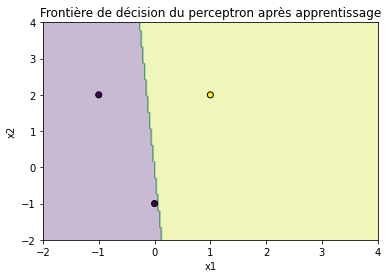

In [10]:
# Création d'un maillage pour la visualisation
xx, yy = np.meshgrid(np.linspace(-2, 4, 200), np.linspace(-2, 4, 200))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = np.array([H(np.dot(w, point)) for point in grid])
Z = Z.reshape(xx.shape)

# Visualisation
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter([X[i][0] for i in range(n)], [X[i][1] for i in range(n)], c=T, edgecolors='k')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Frontière de décision du perceptron après apprentissage')
plt.show()

*La figure ci-dessus montre la frontière de décision du perceptron après apprentissage.*


## Exercice

Écrivez un programme qui applique les règles d'apprentissage données ci-dessus avec différents poids initiaux. Vérifiez si le perceptron parvient à classer correctement les exemples après l'apprentissage.

### Solution

In [12]:
# Données d'entrée (inchangées)
X = []
X.append(np.array([1, 2]))
X.append(np.array([-1, 2]))
X.append(np.array([0, -1]))

# Sorties cibles (inchangées)
T = [1, 0, 0]

# Fonction d'activation de Heaviside (inchangée)
def H(v):
    return 1 if v >= 0 else 0

# Poids initiaux différents
w = np.array([-0.5, -0.9])
print("Poids initiaux :", w)

# Nombre d'exemples
n = len(X)

# Phase d'apprentissage
for epoch in range(10):  # Nombre d'époques d'apprentissage
    print(f"\nÉpoque {epoch+1}")
    for i in range(n):
        x_i = X[i]
        t_i = T[i]
        y_i = H(np.dot(w, x_i))
        error = t_i - y_i
        w = w + error * x_i
        print(f"Exemple {i+1}, Erreur = {error}, Poids mis à jour : {w}")


Poids initiaux : [-0.5 -0.9]

Époque 1
Exemple 1, Erreur = 1, Poids mis à jour : [0.5 1.1]
Exemple 2, Erreur = -1, Poids mis à jour : [ 1.5 -0.9]
Exemple 3, Erreur = -1, Poids mis à jour : [1.5 0.1]

Époque 2
Exemple 1, Erreur = 0, Poids mis à jour : [1.5 0.1]
Exemple 2, Erreur = 0, Poids mis à jour : [1.5 0.1]
Exemple 3, Erreur = 0, Poids mis à jour : [1.5 0.1]

Époque 3
Exemple 1, Erreur = 0, Poids mis à jour : [1.5 0.1]
Exemple 2, Erreur = 0, Poids mis à jour : [1.5 0.1]
Exemple 3, Erreur = 0, Poids mis à jour : [1.5 0.1]

Époque 4
Exemple 1, Erreur = 0, Poids mis à jour : [1.5 0.1]
Exemple 2, Erreur = 0, Poids mis à jour : [1.5 0.1]
Exemple 3, Erreur = 0, Poids mis à jour : [1.5 0.1]

Époque 5
Exemple 1, Erreur = 0, Poids mis à jour : [1.5 0.1]
Exemple 2, Erreur = 0, Poids mis à jour : [1.5 0.1]
Exemple 3, Erreur = 0, Poids mis à jour : [1.5 0.1]

Époque 6
Exemple 1, Erreur = 0, Poids mis à jour : [1.5 0.1]
Exemple 2, Erreur = 0, Poids mis à jour : [1.5 0.1]
Exemple 3, Erreur = 0, 

#### Vérification des Résultats


In [13]:
# Phase de test
print("\nPhase de test après apprentissage")
for i in range(n):
    x_i = X[i]
    t_i = T[i]
    y_i = H(np.dot(w, x_i))
    print(f"Exemple {i+1} : Sortie prédite = {y_i}, Sortie réelle = {t_i}, Correct = {y_i == t_i}")


Phase de test après apprentissage
Exemple 1 : Sortie prédite = 1, Sortie réelle = 1, Correct = True
Exemple 2 : Sortie prédite = 0, Sortie réelle = 0, Correct = True
Exemple 3 : Sortie prédite = 0, Sortie réelle = 0, Correct = True


### Bonus : Visualisation de l'Évolution des Poids

Nous pouvons représenter graphiquement l'évolution de la frontière de décision du perceptron au cours des itérations.


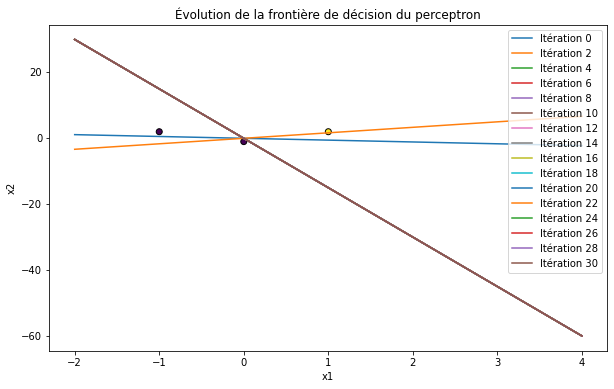

In [14]:
# Réinitialisation des poids
w = np.array([-0.5, -0.9])

# Stockage des poids pour la visualisation
weights_history = [w.copy()]

# Phase d'apprentissage avec stockage des poids
for epoch in range(10):
    for i in range(n):
        x_i = X[i]
        t_i = T[i]
        y_i = H(np.dot(w, x_i))
        error = t_i - y_i
        w = w + error * x_i
        weights_history.append(w.copy())

# Visualisation de l'évolution de la frontière de décision
plt.figure(figsize=(10, 6))
for idx, w in enumerate(weights_history):
    if idx % 2 == 0:  # Pour éviter un trop grand nombre de courbes
        # Calcul de la frontière de décision
        x_vals = np.linspace(-2, 4, 100)
        y_vals = -(w[0]/w[1]) * x_vals
        plt.plot(x_vals, y_vals, label=f'Itération {idx}')

# Données
plt.scatter([X[i][0] for i in range(n)], [X[i][1] for i in range(n)], c=T, edgecolors='k')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title("Évolution de la frontière de décision du perceptron")
plt.legend()
plt.show()

*La figure ci-dessus montre l'évolution de la frontière de décision du perceptron au cours des itérations.*

## Conclusion

La règle d'apprentissage du perceptron est un algorithme supervisé simple mais puissant pour l'ajustement des poids dans un réseau neuronal. Elle illustre comment un modèle peut apprendre à partir de données étiquetées en minimisant l'erreur entre la sortie prédite et la sortie désirée. Bien que le perceptron ne puisse résoudre que des problèmes linéairement séparables, il constitue une base importante pour comprendre des réseaux neuronaux plus complexes et des algorithmes d'apprentissage plus avancés.